In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/insurance.csv')
df.sample(4)

,age,sex,bmi,children,smoker,region,charges
1093,22,female,30.400,0,yes,northwest,33907.54800
63,28,female,25.935,1,no,northwest,4133.64165
772,44,female,36.480,0,no,northeast,12797.20962
527,51,female,25.800,1,no,southwest,9861.02500


# Analisis Descriptive statistik

In [3]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [4]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [5]:
smoker = df[df['smoker'] == 'yes'] 
smoker['bmi'].describe()

count    274.000000
mean      30.708449
std        6.318644
min       17.195000
25%       26.083750
50%       30.447500
75%       35.200000
max       52.580000
Name: bmi, dtype: float64

In [6]:
non_smoker = df[df['smoker'] == 'no'] 
non_smoker.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


In [7]:
smoker = df[df['smoker'] == 'yes'] 
smoker.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [8]:
male_smoker = smoker[smoker['sex'] == 'male']
male_smoker['age'].mean()

38.44654088050314

In [9]:
female_smoker = smoker[smoker['sex'] == 'female']
female_smoker['age'].mean()

38.608695652173914

In [10]:
under_bmi_smoker = smoker[smoker['bmi'] < 25]
under_bmi_smoker.mean()

<ipython-input-10-05d69d5c9d03>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  under_bmi_smoker.mean()


age            37.309091
bmi            22.277182
children        1.236364
charges     19839.278309
dtype: float64

In [11]:
over_bmi_non_smoker = non_smoker[non_smoker['bmi'] > 25]
over_bmi_non_smoker.mean()

<ipython-input-11-f645d99d9b6b>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  over_bmi_non_smoker.mean()


age           40.068807
bmi           32.510092
children       1.091743
charges     8629.589610
dtype: float64

# Analisis variabel diskrit

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df_sorted = df.sort_values('charges', ascending=False)

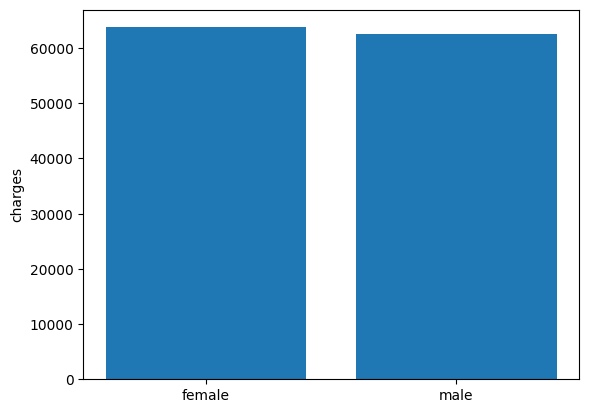

In [14]:
plt.bar(df_sorted['sex'], df_sorted['charges'])
plt.ylabel('charges');

Text(0, 0.5, 'charges')

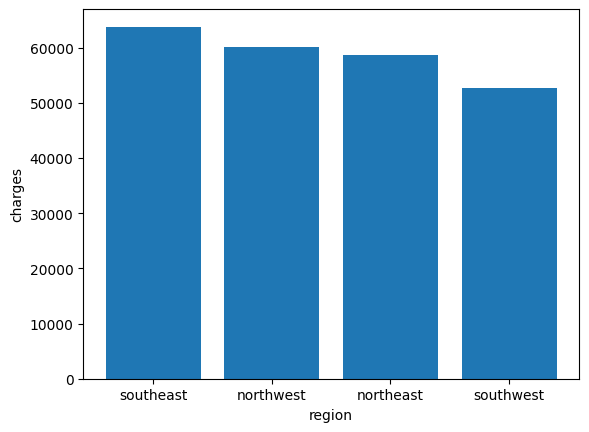

In [15]:
plt.bar(df_sorted['region'], df_sorted['charges'])
plt.xlabel('region')
plt.ylabel('charges')

Text(0, 0.5, 'jumlah orang')

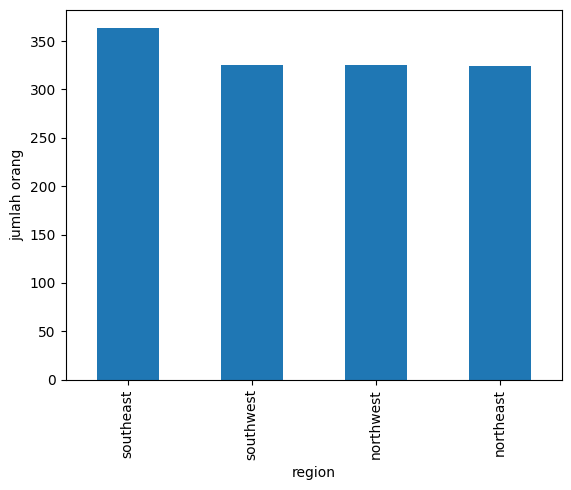

In [16]:
region = df['region'].value_counts()
region.plot(kind='bar');
plt.xlabel('region')
plt.ylabel('jumlah orang')

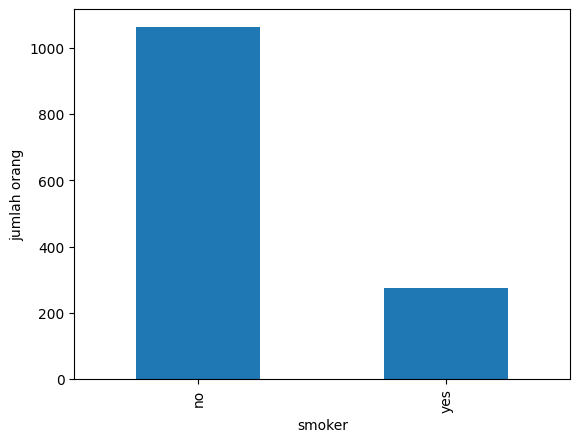

In [17]:
smoker = df['smoker'].value_counts()
smoker.plot(kind='bar');
plt.xlabel('smoker')
plt.ylabel('jumlah orang');

In [18]:
# mencari jumlah irisan perempuan dan perokok
n_female_smoker = df[(df['sex'] == 'female') & (df['smoker'] == 'yes')].count()[1]
n_female_smoker

115

In [19]:
n_smoker = df['smoker'].count()
n_smoker

1338

In [20]:
p_female_jika_smoker = n_female_smoker/n_smoker
p_female_jika_smoker

0.08594917787742899

In [21]:
# mencari jumlah irisan laki-laki dan perokok
n_male_smoker = df[(df['sex'] == 'male') & (df['smoker'] == 'yes')].count()[1]
n_male_smoker

159

In [22]:
p_male_jika_smoker = n_male_smoker/n_smoker
p_male_jika_smoker

0.11883408071748879

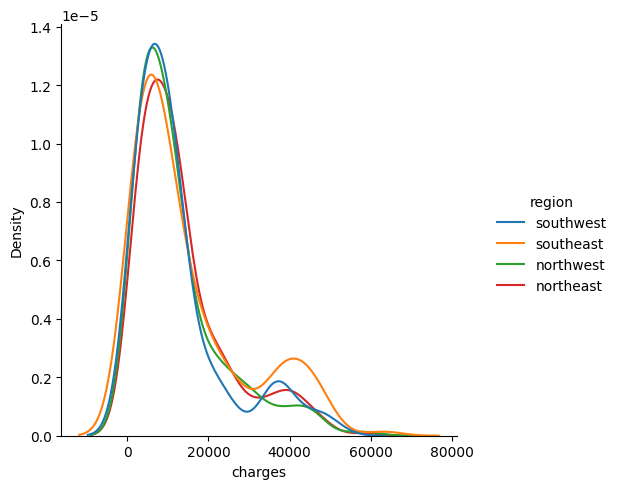

In [23]:
sns.displot(data=df, x='charges', hue='region', kind='kde')

Text(0, 0.5, 'charges')

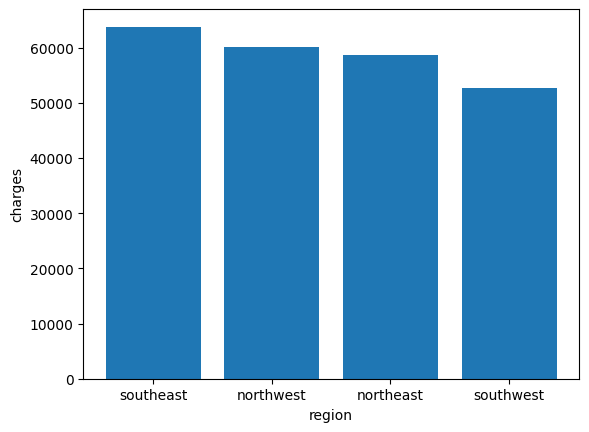

In [24]:
plt.bar(df_sorted['region'], df_sorted['charges'])
plt.xlabel('region')
plt.ylabel('charges')

In [25]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Analisis variabel kontinu

In [26]:
def convert(x):
    if x<25:
        return "bmi_under_25"
    else:
      return "bmi_upper_25"

In [27]:
df['new_bmi'] = df['bmi'].apply(convert)

In [28]:
df['new_bmi'].value_counts()

bmi_upper_25    1093
bmi_under_25     245
Name: new_bmi, dtype: int64

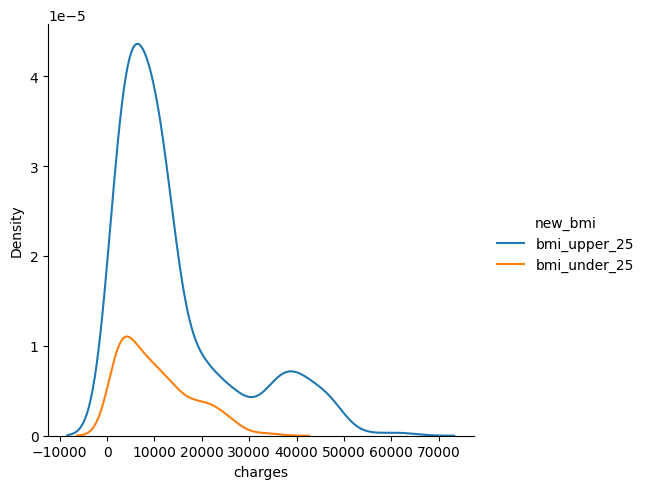

In [29]:
sns.displot(data=df, x='charges', hue='new_bmi', kind='kde')


In [30]:
df[df['charges'] > 16700]

,age,sex,bmi,children,smoker,region,charges,new_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,bmi_upper_25
3,33,male,22.705,0,no,northwest,21984.47061,bmi_under_25
9,60,female,25.840,0,no,northwest,28923.13692,bmi_upper_25
11,62,female,26.290,0,yes,southeast,27808.72510,bmi_upper_25
14,27,male,42.130,0,yes,southeast,39611.75770,bmi_upper_25
...,...,...,...,...,...,...,...,...
1318,35,male,39.710,4,no,northeast,19496.71917,bmi_upper_25
1321,62,male,26.695,0,yes,northeast,28101.33305,bmi_upper_25
1323,42,female,40.370,2,yes,southeast,43896.37630,bmi_upper_25
1328,23,female,24.225,2,no,northeast,22395.74424,bmi_under_25


In [31]:
nA = df[(df['bmi'] > 25) & (df['charges'] > 16700)].count()[1]
nB = df[df['bmi'] > 25].count()[1]
p_nA_diket_nB = nA / nB
p_nA_diket_nB

0.25939505041246563

In [32]:
nA = df[(df['bmi'] < 25) & (df['charges'] > 16700)].count()[1]
nB = df[df['bmi'] < 25].count()[1]
p_nA_diket_nB = nA / nB
p_nA_diket_nB

0.20816326530612245

In [33]:
nA = df[(df['bmi'] > 25) & (df['charges'] > 16700) & (df['smoker'] == 'yes')].count()[1]
nB = df[(df['bmi'] > 25) & (df['smoker'] == 'yes')].count()[1]
p_nA_diket_nB = nA / nB
p_nA_diket_nB

0.9817351598173516

In [34]:
nA = df[(df['bmi'] > 25) & (df['charges'] > 16700) & (df['smoker'] == 'no')].count()[1]
nB = df[(df['bmi'] > 25) & (df['smoker'] == 'no')].count()[1]
p_nA_diket_nB = nA / nB
p_nA_diket_nB

0.0779816513761468

In [35]:
bmi = df[df['bmi'] > 25]

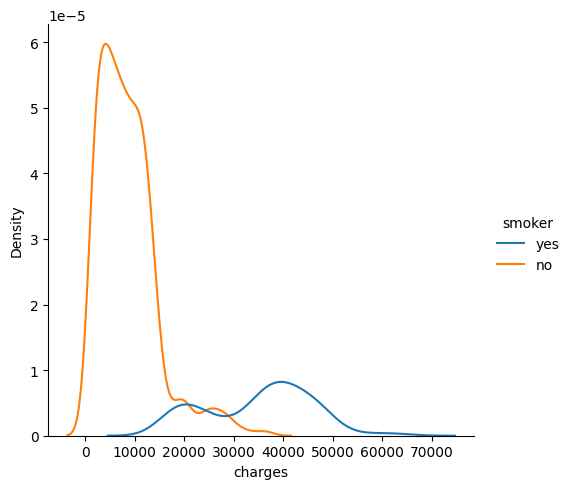

In [36]:
sns.displot(data=bmi, x='charges', hue='smoker', kind='kde')


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['smoker'])
 
# printing label
label

array([1, 0, 0, ..., 0, 0, 1])

In [38]:
df['new smoker'] = label

In [39]:
df.head()

,age,sex,bmi,children,smoker,region,charges,new_bmi,new smoker
0,19,female,27.900,0,yes,southwest,16884.92400,bmi_upper_25,1
1,18,male,33.770,1,no,southeast,1725.55230,bmi_upper_25,0
2,28,male,33.000,3,no,southeast,4449.46200,bmi_upper_25,0
3,33,male,22.705,0,no,northwest,21984.47061,bmi_under_25,0
4,32,male,28.880,0,no,northwest,3866.85520,bmi_upper_25,0


# Analisis korelasi variabel 

<Axes: >

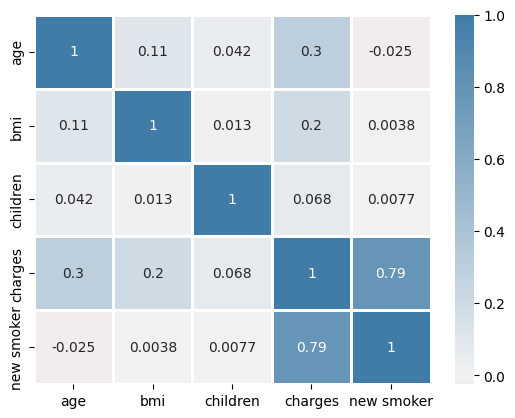

In [40]:
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
sns.heatmap(
df.corr(), center=0,
cmap=cmap, linewidths=1,
annot=True)

<Axes: xlabel='bmi', ylabel='charges'>

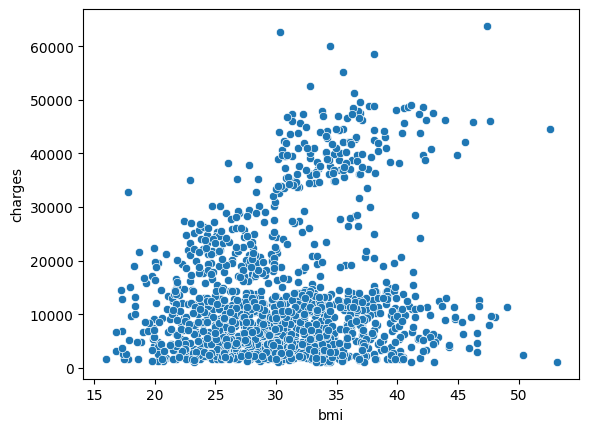

In [41]:
sns.scatterplot(x=df['bmi'], y=df['charges'])

# Hipotesis testing

## 1.

In [46]:
# Visualisasi
import numpy as np
import matplotlib.pyplot as plt


from scipy.stats import t
from scipy.stats import ttest_1samp
def critical_value_t_stats_less(t_crit,df):
    plt.style.use('seaborn')

    plt.fill_between(x=np.arange(-4,t_crit,0.01),
                     y1= t.pdf(np.arange(-4,t_crit,0.01), df=df) ,
                     facecolor='blue',
                     alpha=0.35,
                     label= 'Area below t-crit'
                     )

    plt.fill_between(x=np.arange(t_crit,4,0.01), 
                     y1= t.pdf(np.arange(t_crit,4,0.01), df=df) ,
                     facecolor='red',
                     alpha=0.35, 
                     label= 'Area above t_crit')
    plt.legend()
    plt.xlabel("critical value visualization in t-distribution")
    plt.title(f't-statistic = {round(t_crit,2)}');

def sample_and_population_mean(data):
    # Histogram
    plt.hist(data, bins=5) 

    # memberi judul pada histogram
    plt.title("Histogram Rata-Rata Kecepatan Sam Berlari")

    # memberi label pada koordinat x
    plt.xlabel("Rata-Rata Kecepatan Sam Berlari")

    # memberi label pada koordinat y
    plt.ylabel("Frequency")

    # membuat garis lurus untuk menandakan mean sample
    plt.axvline(np.mean(data), color='k', linestyle=':', linewidth=1,label= 'Mean sampel')

    # membuat garis lurus untuk menandakan mean populasi
    plt.axvline(8, color='k', linestyle='dashed', linewidth=1,label= 'Mean population')

    # menambahkan label pada histogram
    plt.legend(loc = 'upper left')
    plt.show()

In [59]:
from scipy.stats import t
from scipy.stats import ttest_1samp

alpha = 0.05

smoker = df[df['smoker'] == 'yes']
nonsmoker = df[df['smoker'] == 'no']

In [60]:
# Nilai Critical Value berdasarkan critical t dari t-table dengan nilai alpha 0.005 dan degree of freedom 9 (df = n-1)
t_crit = t.ppf(alpha,df=smoker.shape[0]-1)
print(t_crit)

-1.650454303021593


<ipython-input-46-ffb638f1d71e>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


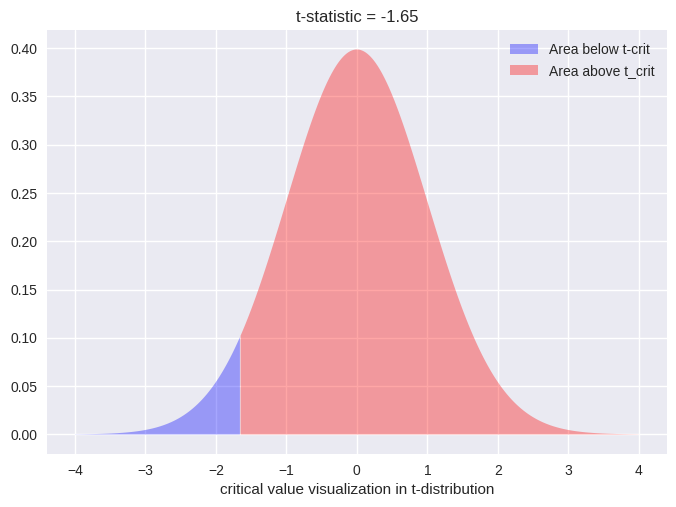

In [61]:
critical_value_t_stats_less(t_crit=t_crit,df=smoker.shape[0]-1)

In [52]:
np.var(smoker['charges']), np.var(nonsmoker['charges'])

(132721153.13625307, 35891656.00316426)

In [53]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = smoker['charges'], b = nonsmoker['charges'], equal_var=False, alternative='greater') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.5f' % (stat, p)) 

Statistics = 32.7519, p-value = 0.00000


In [54]:
print('Pengambilan Keputusan')

# jika p-value besar dari alpha maka:
if p > alpha:
  print('Gagal tolak H0)') 
# jika p-value tidak lebih besar dari alpha maka:
else:
  print('Tolak H0')

Pengambilan Keputusan
Tolak H0


In [55]:
print('Pengambilan Keputusan')

# jika stat lebih kecil dari t_crit maka:
if stat < t_crit:
  print('Gagal tolak H0)') 
# jika p-value tidak lebih besar dari alpha maka:
else:
  print('Tolak H0')

Pengambilan Keputusan
Tolak H0


## 2. 

In [66]:
alpha = 0.05

male = df[df['sex'] == 'male']
female = df[df['sex'] == 'female']

In [67]:
# Nilai Critical Value berdasarkan critical t dari t-table dengan nilai alpha 0.005 dan degree of freedom 9 (df = n-1)
t_crit = t.ppf(alpha,df=male.shape[0]-1)
print(t_crit)

-1.6471141829675953


<ipython-input-46-ffb638f1d71e>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


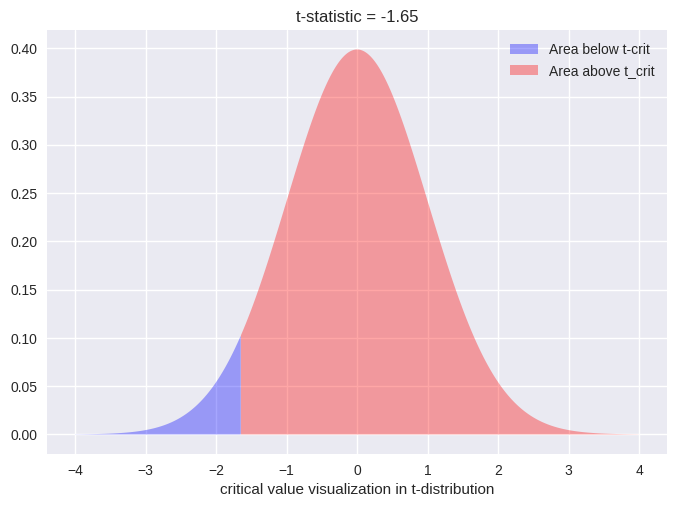

In [68]:
critical_value_t_stats_less(t_crit=t_crit,df=male.shape[0]-1)

In [62]:
np.var(male['charges']), np.var(female['charges'])

(167998626.43422315, 123660966.64456937)

In [63]:
stat, p = ttest_ind(a = male['charges'], b = female['charges'], equal_var=False, alternative='greater') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.5f' % (stat, p)) 

Statistics = 2.1009, p-value = 0.01792


In [64]:
print('Pengambilan Keputusan')

# jika p-value besar dari alpha maka:
if p > alpha:
  print('Gagal tolak H0)') 
# jika p-value tidak lebih besar dari alpha maka:
else:
  print('Tolak H0')

Pengambilan Keputusan
Tolak H0


In [65]:
print('Pengambilan Keputusan')

# jika stat lebih kecil dari t_crit maka:
if stat < t_crit:
  print('Gagal tolak H0)') 
# jika p-value tidak lebih besar dari alpha maka:
else:
  print('Tolak H0')

Pengambilan Keputusan
Tolak H0
